In [6]:
import pandas as pd 
pd.plotting.register_matplotlib_converters() 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 

# 읽어드릴 파일 경로 지정
bike_filepath = "bike_sharing_demand_train.csv"

# 변수에 파일에 있는 데이터 셋 로드
bike_data = pd.read_csv(bike_filepath)
bike_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [17]:
bike_data['datetime'] = bike_data['datetime'].astype('datetime64')

In [18]:
bike_data['year'] = bike_data['datetime'].dt.year
bike_data['month'] = bike_data['datetime'].dt.month
bike_data['day'] = bike_data['datetime'].dt.day
bike_data['hour'] = bike_data['datetime'].dt.hour
bike_data['minute'] = bike_data['datetime'].dt.minute
bike_data['second'] = bike_data['datetime'].dt.second

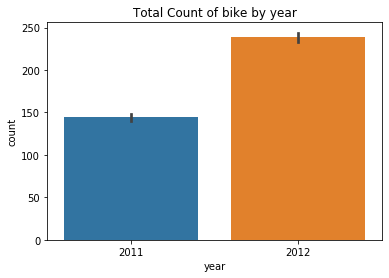

In [24]:
# 도표의 제목 설정
plt.title("Total Count of bike by year") 
sns.barplot(x=bike_data['year'], y=bike_data['count'])

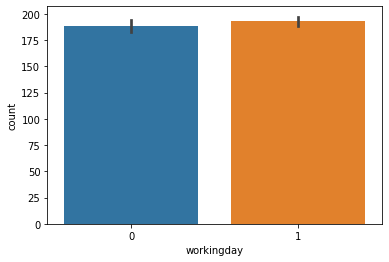

In [51]:
sns.barplot(x=bike_data['workingday'], y=bike_data['count'])

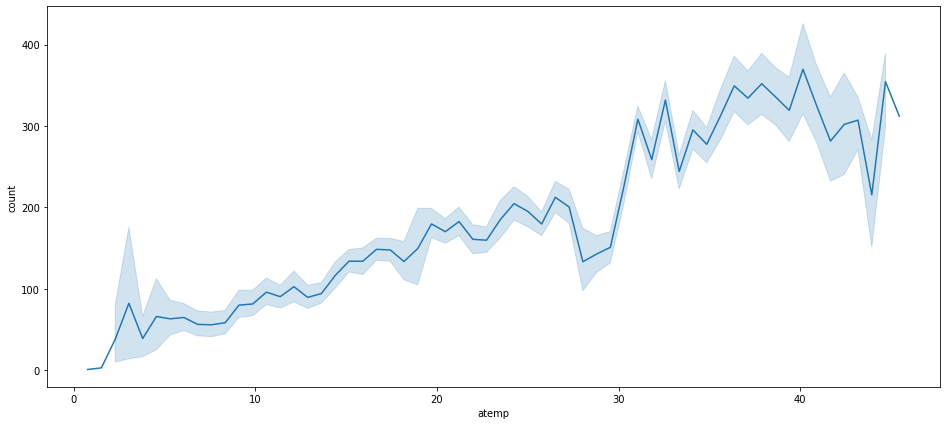

In [48]:
plt.figure(figsize=(16, 7))
sns.lineplot(data=bike_data, x="atemp", y="count")

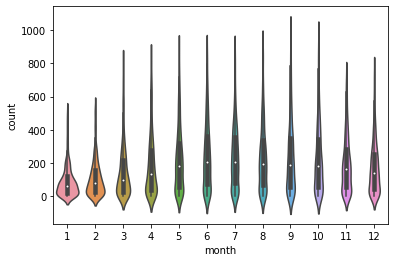

In [50]:
sns.violinplot(data=bike_data, x="month", y="count")

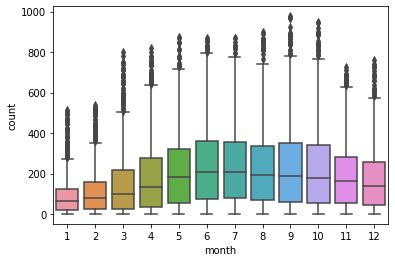

In [29]:
sns.boxplot(data=bike_data, x="month", y="count")

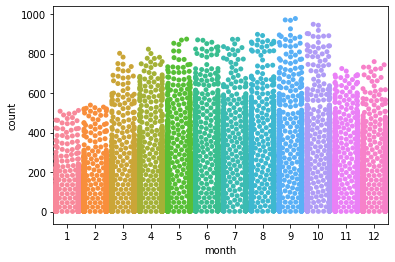

In [30]:
sns.swarmplot(data=bike_data, x="month", y="count")

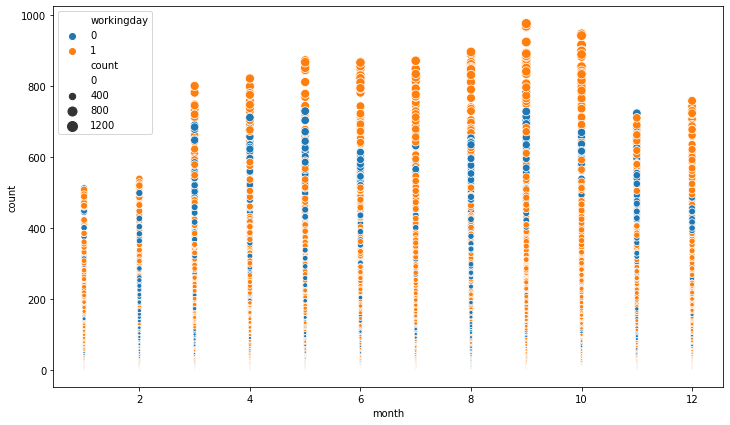

In [58]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=bike_data, x="month", y="count", hue="workingday", size="count", sizes=(0, 100))

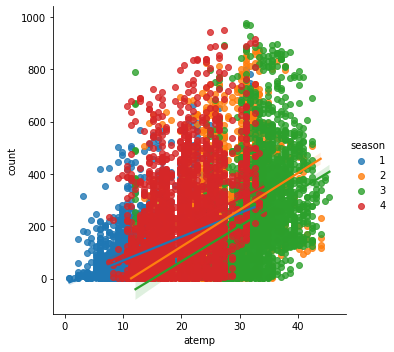

In [66]:
##체감온도가 높은 여름, 가을에 대여량이 높다.
sns.lmplot(x="atemp", y="count", hue="season", data=bike_data)

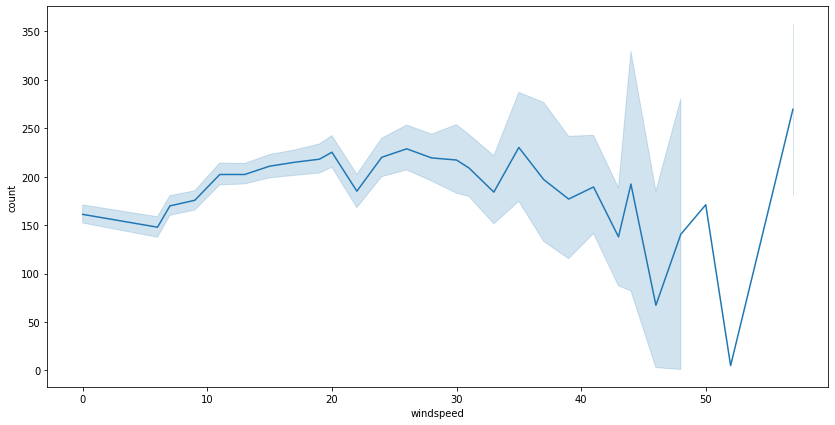

In [61]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=bike_data, x="windspeed", y="count")

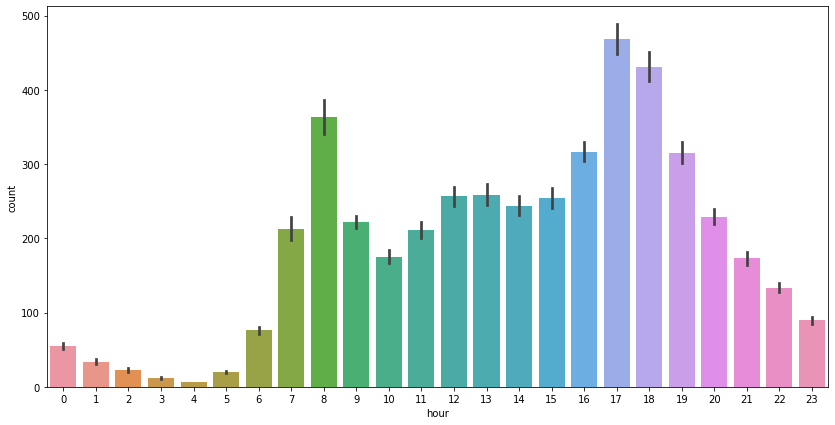

In [63]:
plt.figure(figsize=(14, 7))
sns.barplot(x=bike_data['hour'], y=bike_data['count'])

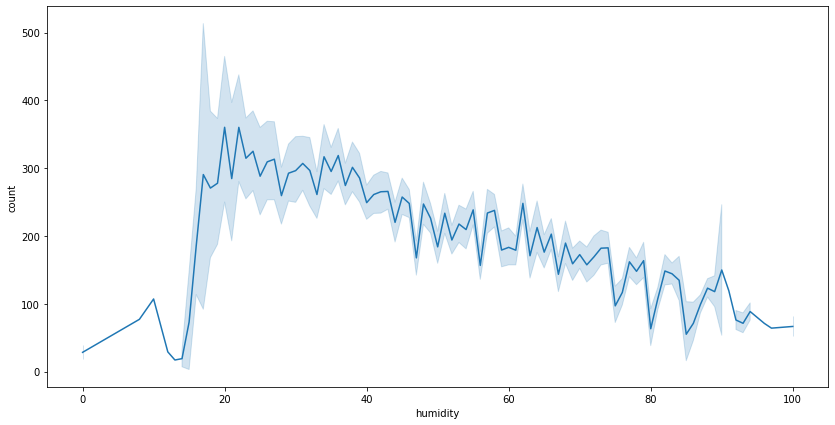

In [68]:
## 습도가 15~20 사이일 때 대여량이 급증하여 그 뒤로는 습도가 높을수록 점점 대여량이 감소한다.
plt.figure(figsize=(14, 7))
sns.lineplot(x=bike_data['humidity'], y=bike_data['count'])

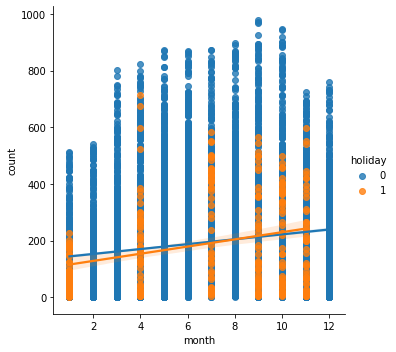

In [37]:
## 휴일과 휴일이 아닐 때 자전거 대여량의 상관관계 => 휴일일 때가 조금 더 자전거 대여량이 높다
sns.lmplot(x="month", y="count", hue="holiday", data=bike_data)

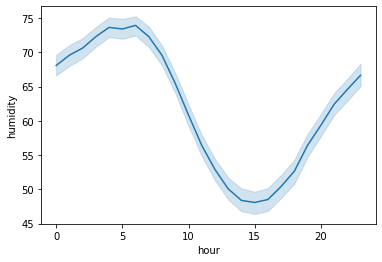

In [44]:
## 5시~15시를 기점으로 습도가 급격히 떨어진다.
sns.lineplot(x=bike_data['hour'], y=bike_data['humidity'])

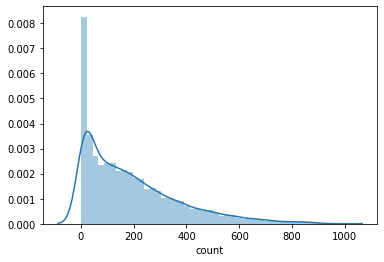

In [46]:
## 자전거 대여량의 분포는 0~100 사이에 집중되어 있음
sns.distplot(bike_data["count"])

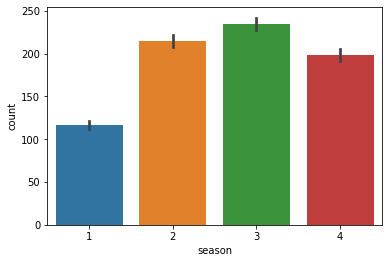

In [59]:
## 계절별 자전거 대여량 => 봄 < 겨울 < 여름 < 가을 순
sns.barplot(x=bike_data['season'], y=bike_data['count'])